In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Lets first load the review dataset 

df_1 = pd.read_csv("C:\\Users\\91777\\Downloads\\Sephora Dataset\\reviews_0-250.csv", low_memory = False)
df_2 = pd.read_csv("C:\\Users\\91777\\Downloads\\Sephora Dataset\\reviews_250-500.csv")
df_3 = pd.read_csv("C:\\Users\\91777\\Downloads\\Sephora Dataset\\reviews_500-750.csv")
df_4 = pd.read_csv("C:\\Users\\91777\Downloads\\Sephora Dataset\\reviews_750-1250.csv", low_memory = False)
df_5 = pd.read_csv("C:\\Users\\91777\\Downloads\\Sephora Dataset\\reviews_1250-end.csv", low_memory = False)



In [4]:

df_reviews = pd.concat([df_1, df_2, df_3, df_4, df_5],axis=0)
print("df_reviews shape: ",df_reviews.shape)

df_reviews shape:  (1094411, 19)


In [5]:
df_reviews.columns

Index(['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd'],
      dtype='object')

In [6]:
df_reviews.drop(columns = 'Unnamed: 0', inplace = True)

In [7]:
df_reviews.columns

Index(['author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd'],
      dtype='object')

# Let's load the product info dataset 

In [8]:
df_product = pd.read_csv("C:\\Users\\91777\\Downloads\\Sephora Dataset\\product_info.csv")

In [9]:
df_product.shape

(8494, 27)

In [10]:
# Lets check df_product_info which columns that similar with df_reviews

cols_to_use = df_product.columns.difference(df_reviews.columns)
cols_to_use = list(cols_to_use)
cols_to_use.append('product_id')
print(cols_to_use)

['brand_id', 'child_count', 'child_max_price', 'child_min_price', 'highlights', 'ingredients', 'limited_edition', 'loves_count', 'new', 'online_only', 'out_of_stock', 'primary_category', 'reviews', 'sale_price_usd', 'secondary_category', 'sephora_exclusive', 'size', 'tertiary_category', 'value_price_usd', 'variation_desc', 'variation_type', 'variation_value', 'product_id']


In [11]:
df = pd.merge(df_reviews, df_product[cols_to_use], how='outer', on=['product_id', 'product_id'])
df.shape

(1100554, 40)

In [12]:
df.head()

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,...,reviews,sale_price_usd,secondary_category,sephora_exclusive,size,tertiary_category,value_price_usd,variation_desc,variation_type,variation_value
0,1741593524,5.0,1.0,1.0,2.0,0.0,2.0,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,...,1.0,NaN,Cleansers,0,2.4 oz / 70 ml,NaN,NaN,NaN,Size,2.4 oz / 70 ml
1,31423088263,1.0,0.0,NaN,0.0,0.0,0.0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,...,16118.0,NaN,Lip Balms & Treatments,1,0.7 oz/ 20 g,NaN,NaN,NaN,Color,Original
2,5061282401,5.0,1.0,NaN,0.0,0.0,0.0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,...,16118.0,NaN,Lip Balms & Treatments,1,0.7 oz/ 20 g,NaN,NaN,NaN,Color,Original
3,6083038851,5.0,1.0,NaN,0.0,0.0,0.0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,...,16118.0,NaN,Lip Balms & Treatments,1,0.7 oz/ 20 g,NaN,NaN,NaN,Color,Original
4,47056667835,5.0,1.0,NaN,0.0,0.0,0.0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,...,16118.0,NaN,Lip Balms & Treatments,1,0.7 oz/ 20 g,NaN,NaN,NaN,Color,Original


# 📦Data Pre-Processing
# 👻Handling missing values 

In [13]:
missing = []
unique = []
types = []
variables = []
count = []

for item in df.columns:
    variables.append(item)
    missing.append(df[item].isnull().sum())
    unique.append(df[item].nunique())
    types.append(df[item].dtypes)
    count.append(len(df[item]))
    
output = pd.DataFrame({
    'variable': variables, 
    'dtype': types,
    'count': count,
    'unique': unique,
    'missing': missing, 
   
})
print("Df info : ")
output.sort_values("missing",ascending=False).reset_index(drop=True)

Df info : 


,variable,dtype,count,unique,missing
0,variation_desc,object,1100554,935,1091034
1,sale_price_usd,float64,1100554,88,1090576
2,value_price_usd,float64,1100554,174,1069365
3,child_max_price,float64,1100554,222,644796
4,child_min_price,float64,1100554,208,644796
5,helpfulness,float64,1100554,3767,567735
6,review_title,object,1100554,364105,316797
7,hair_color,object,1100554,7,232911
8,eye_color,object,1100554,6,215771
9,skin_tone,object,1100554,14,176682


Dropping Columns

In the dataset, there few of columns that have a lot missing values.

So im gonna drop these columns.

In [14]:
cols = """variation_desc
sale_price_usd
value_price_usd
child_max_price
child_min_price
review_title"""
cols_list = cols.split("\n")

df.drop(columns=cols_list,axis=1,inplace=True)

Dropping Rows

Drop rows with missing values

In [15]:
df.dropna(axis=0,inplace=True)

In [16]:
df.isnull().sum()

author_id                   0
rating                      0
is_recommended              0
helpfulness                 0
total_feedback_count        0
total_neg_feedback_count    0
total_pos_feedback_count    0
submission_time             0
review_text                 0
skin_tone                   0
eye_color                   0
skin_type                   0
hair_color                  0
product_id                  0
product_name                0
brand_name                  0
price_usd                   0
brand_id                    0
child_count                 0
highlights                  0
ingredients                 0
limited_edition             0
loves_count                 0
new                         0
online_only                 0
out_of_stock                0
primary_category            0
reviews                     0
secondary_category          0
sephora_exclusive           0
size                        0
tertiary_category           0
variation_type              0
variation_

In [17]:
df.shape

(304400, 34)

**📈📉 Exploratory Data Analysis**

In this section, I will perform an exploratory data analysis (EDA) on the dataset. The goal of EDA is to gain insights and understanding of the dataset, identify patterns, relationships, and anomalies. Through EDA, we can make informed decisions on how to preprocess and model the data, as well as generate hypotheses for further analysis.

"I will start by analyzing the submission_time of the data and create new columns for day, month, year, and weekday. This will enable me to analyze various factors such as total_feedback_count, total_pos_feedback_count, total_neg_feedback_count, and their trends over the years."

In [18]:
df['submission_time'] = pd.to_datetime(df['submission_time'])

df['year']= df['submission_time'].dt.year

df['month']= df['submission_time'].dt.month

df['day']= df['submission_time'].dt.day

df['weekday']= df['submission_time'].dt.weekday

dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 

df['dayofweek']= df['submission_time'].dt.weekday.map(dw_mapping)

In [19]:
from matplotlib.ticker import NullFormatter
import matplotlib as mpl
mpl.style.use(['ggplot'])
def hundformatter(x, pos):
    return str(round(x / 1e4, 1)) 

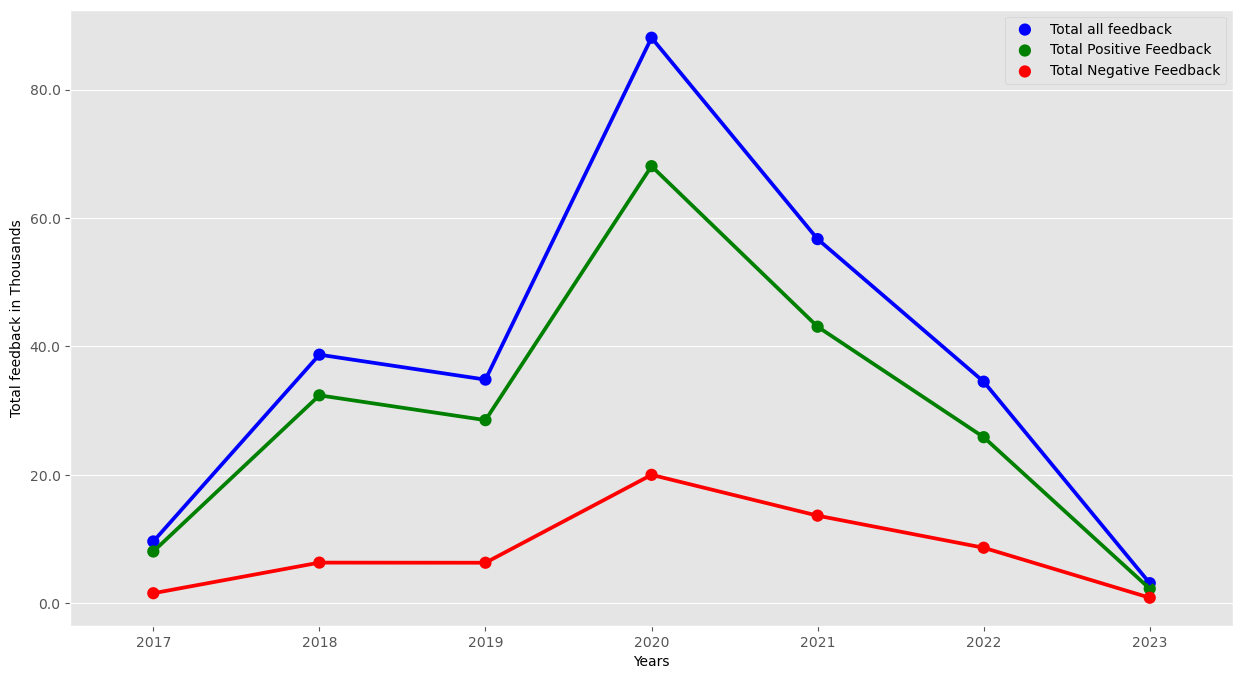

In [20]:
fig, (ax1) = plt.subplots(nrows=1,ncols=1,figsize= (15,8))
total_feedback = df.groupby('year').sum(numeric_only=True)['total_feedback_count'].reset_index()

sns.pointplot(total_feedback,x='year',y='total_feedback_count', color="blue", label="Total all feedback",ax=ax1)

total_pos_feedback = df.groupby('year').sum(numeric_only=True)['total_pos_feedback_count'].reset_index()
sns.pointplot(total_pos_feedback,x='year',y='total_pos_feedback_count', color="green", label="Total Positive Feedback",ax=ax1)

total_neg_feedback = df.groupby('year').sum(numeric_only=True)['total_neg_feedback_count'].reset_index()
sns.pointplot(total_neg_feedback,x='year',y='total_neg_feedback_count', color="red", label="Total Negative Feedback",ax=ax1)

ax1.yaxis.set_major_formatter(hundformatter)
ax1.set_ylabel("Total feedback in Thousands")
ax1.set_xlabel("Years")
ax1.legend()

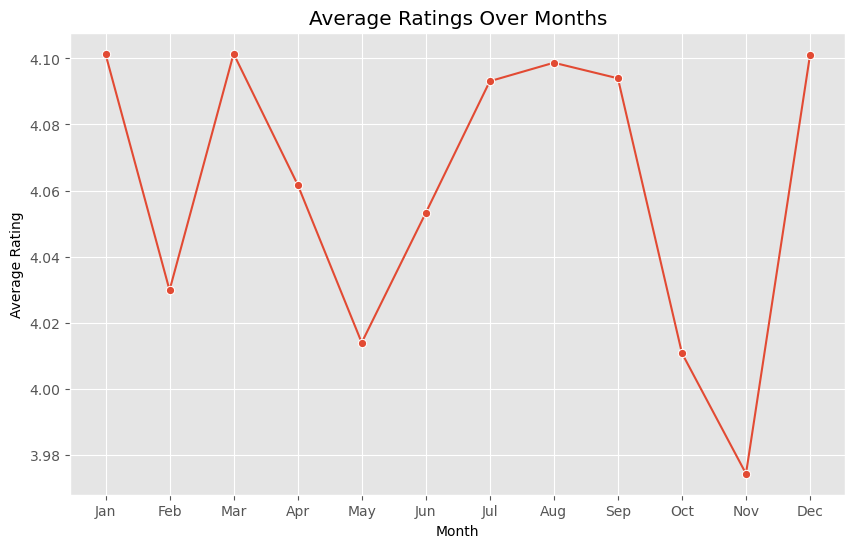

In [80]:

# Ext
df['month'] = df['submission_time'].dt.month


monthly_avg_ratings = df.groupby('month')['rating'].mean()


plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_avg_ratings.index, y=monthly_avg_ratings.values, marker='o')
plt.title('Average Ratings Over Months')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


# Top 10 Products 

Text(0.5, 0.98, 'Top 10 Product')

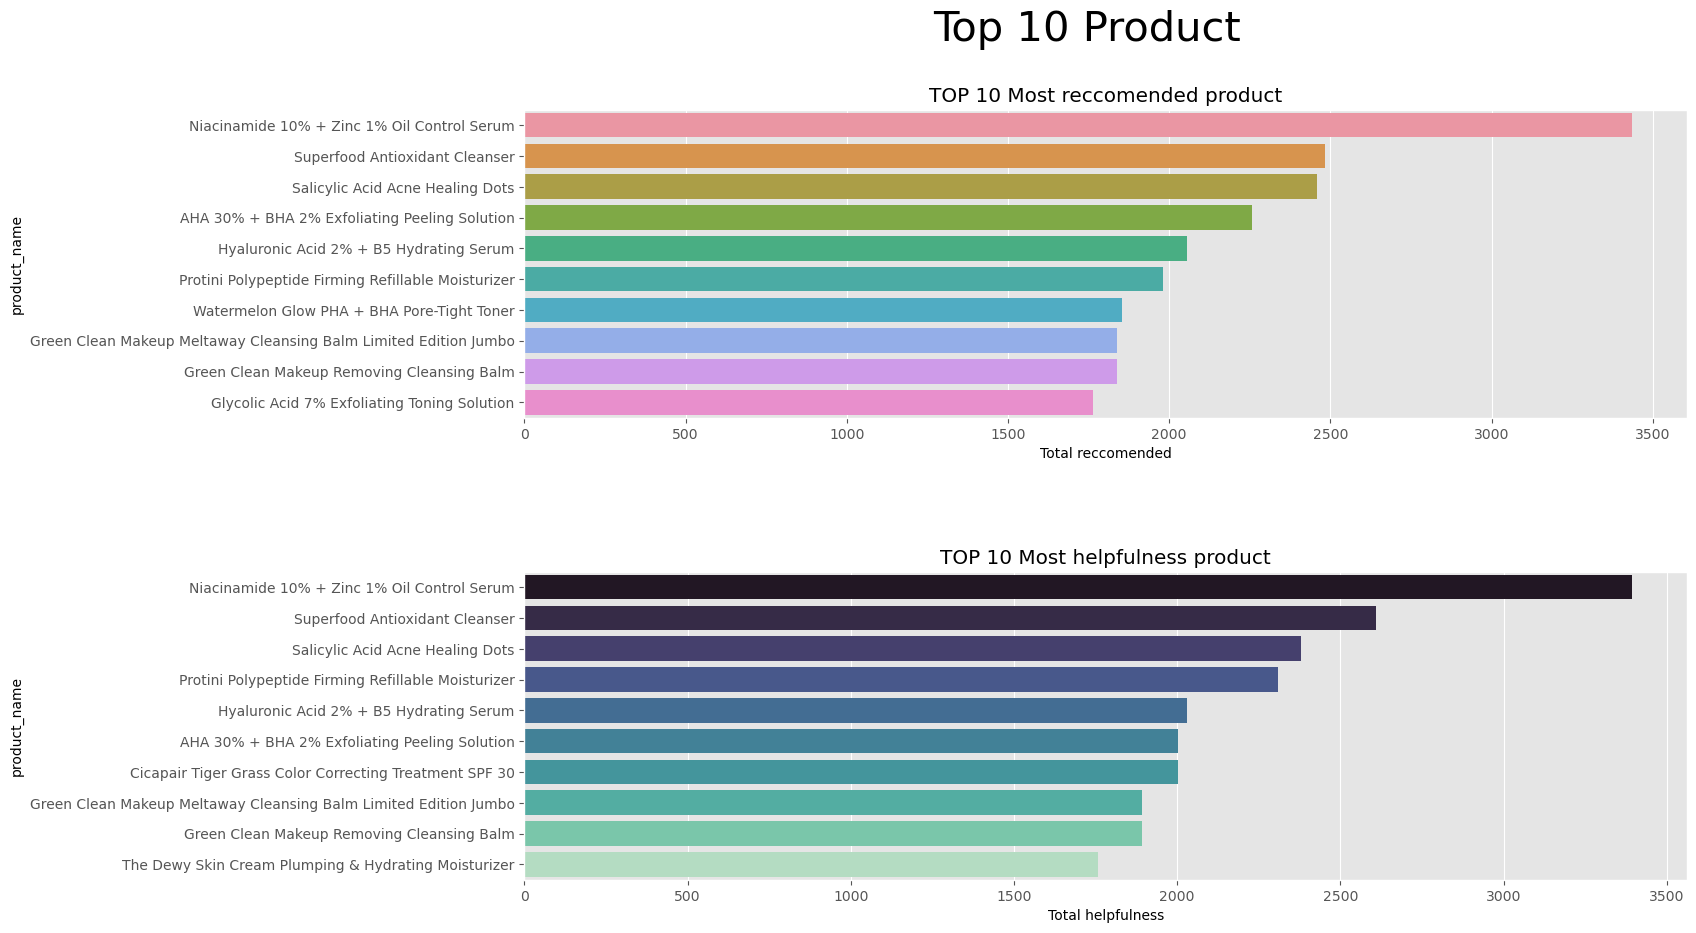

In [21]:
#Top 10  product
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize= (15,10))
fig.subplots_adjust(hspace=0.5)

most_reccomended = df.groupby(['product_id','product_name','brand_name']).sum(numeric_only=True)['is_recommended'].reset_index()\
.sort_values('is_recommended',ascending=False).head(10)
sns.barplot(most_reccomended,x='is_recommended',y='product_name',ax=ax1)
ax1.set_title("TOP 10 Most reccomended product")
ax1.set_xlabel("Total reccomended")

most_helpfulness = df.groupby(['product_id','product_name','brand_name']).sum(numeric_only=True)['helpfulness'].reset_index()\
.sort_values('helpfulness',ascending=False).head(10)
sns.barplot(most_helpfulness,x='helpfulness',y='product_name',ax=ax2,palette='mako')
ax2.set_title("TOP 10 Most helpfulness product")
ax2.set_xlabel("Total helpfulness")

plt.suptitle("Top 10 Product",fontsize=30)

Text(0.5, 0.98, 'Top 10 Product based on price')

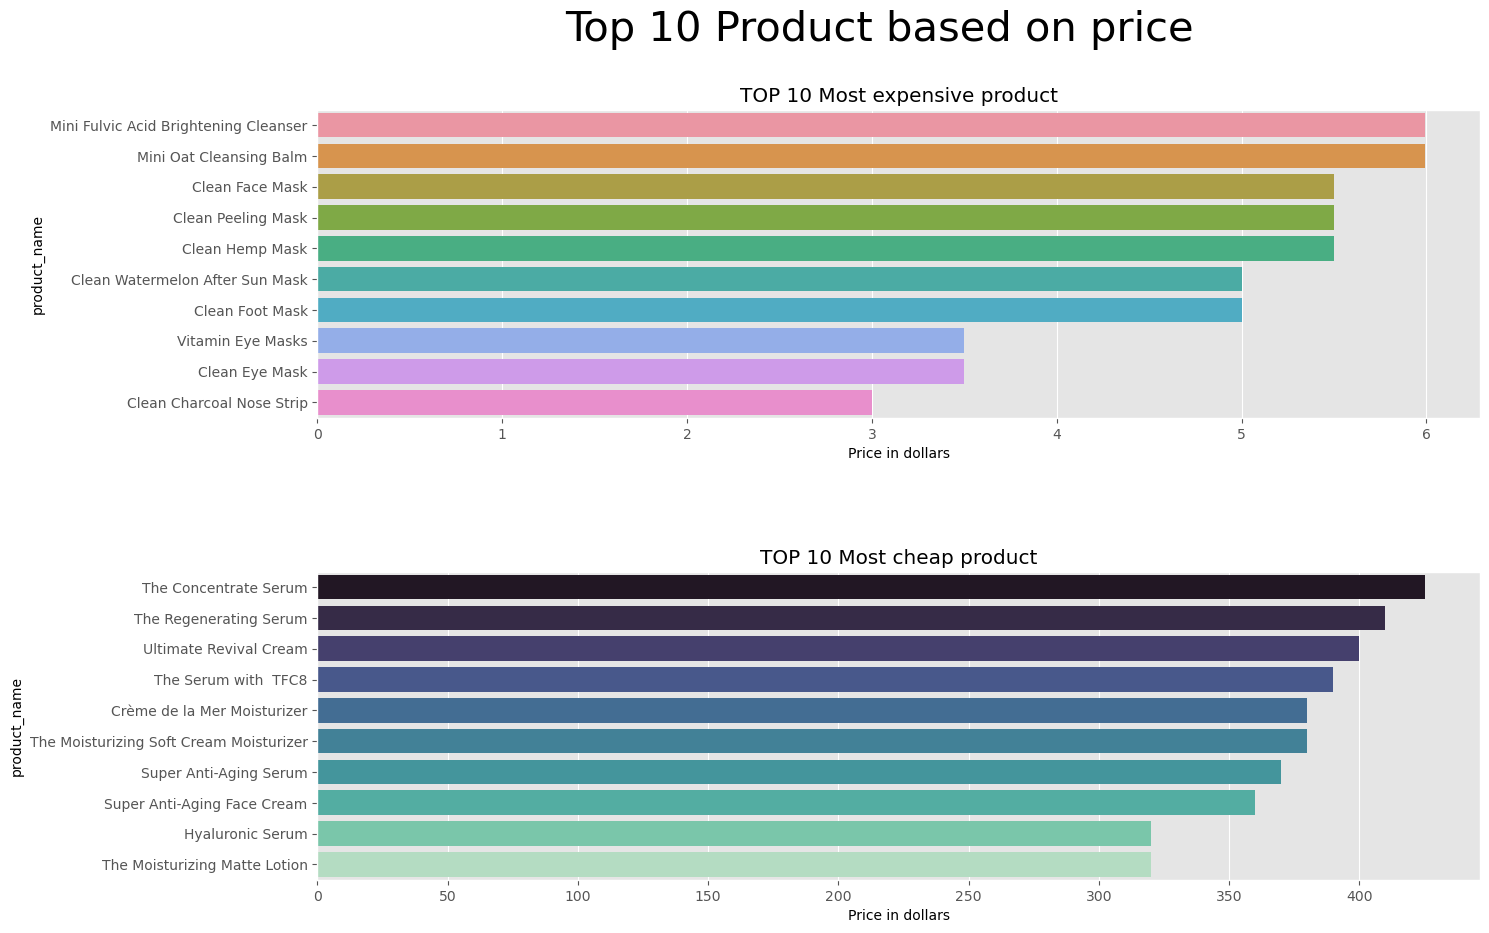

In [22]:
# Top 10 most expensive and cheap product

#Top 10  product
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize= (15,10))
fig.subplots_adjust(hspace=0.5)

most_expensive = df.groupby(['product_id','product_name','price_usd']).sum(numeric_only=True).reset_index()\
.sort_values('price_usd',ascending=True).head(10).sort_values('price_usd',ascending=False)
most_expensive
sns.barplot(most_expensive,x='price_usd',y='product_name',ax=ax1)
ax1.set_title("TOP 10 Most expensive product")
ax1.set_xlabel("Price in dollars")

cheapest = df.groupby(['product_id','product_name','price_usd']).sum(numeric_only=True).reset_index()\
.sort_values('price_usd',ascending=False).head(10)
sns.barplot(cheapest,x='price_usd',y='product_name',ax=ax2,palette='mako')
ax2.set_title("TOP 10 Most cheap product")
ax2.set_xlabel("Price in dollars")

plt.suptitle("Top 10 Product based on price",fontsize=30)

# Top 10 Brand Names 

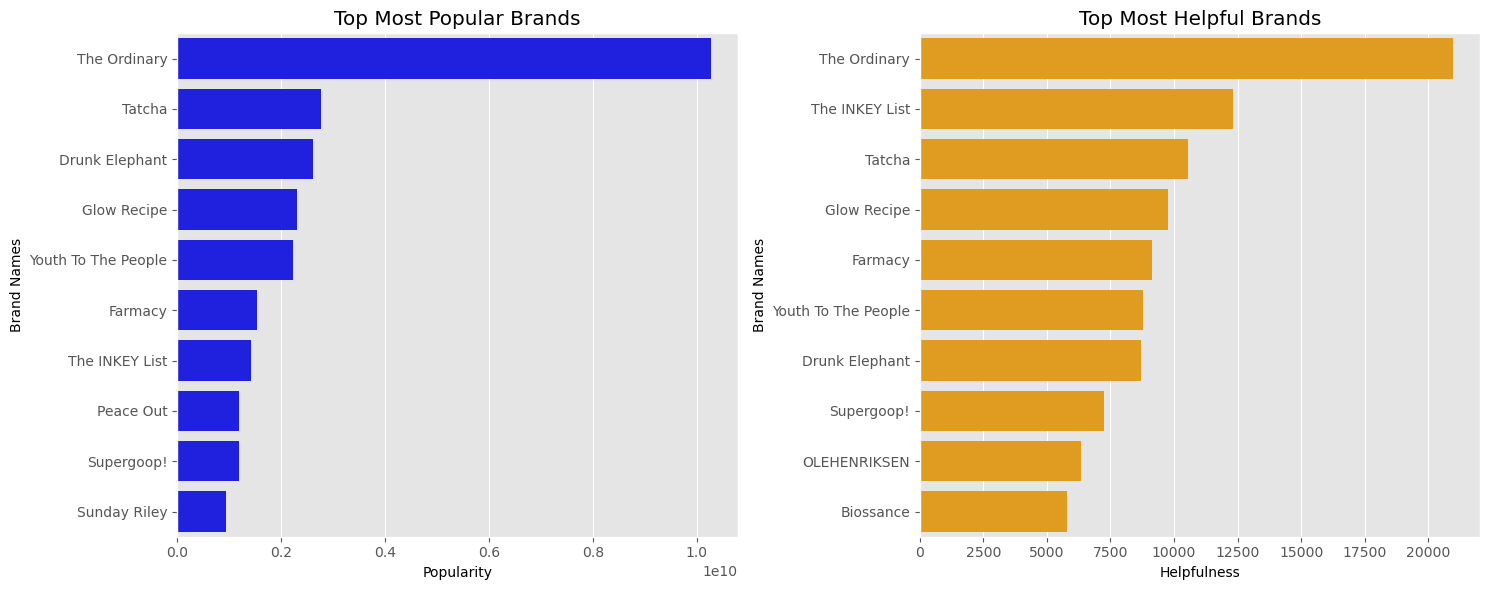

In [23]:



brand_popularity = df.groupby('brand_name')['loves_count'].sum().reset_index()
brand_helpfulness = df.groupby('brand_name')['helpfulness'].sum().reset_index()


top_popular_brands = brand_popularity.sort_values(by='loves_count', ascending=False).head(10)
top_helpful_brands = brand_helpfulness.sort_values(by='helpfulness', ascending=False).head(10)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# For Helpful brands
sns.barplot(x='loves_count', y='brand_name', data=top_popular_brands, color='blue', ax=axs[0])
axs[0].set_xlabel('Popularity')
axs[0].set_ylabel('Brand Names')
axs[0].set_title('Top Most Popular Brands')

# For Popular Brands
sns.barplot(x='helpfulness', y='brand_name', data=top_helpful_brands, color='orange', ax=axs[1])
axs[1].set_xlabel('Helpfulness')
axs[1].set_ylabel('Brand Names')
axs[1].set_title('Top Most Helpful Brands')

plt.tight_layout()
plt.show()


# Time Based Analysis 

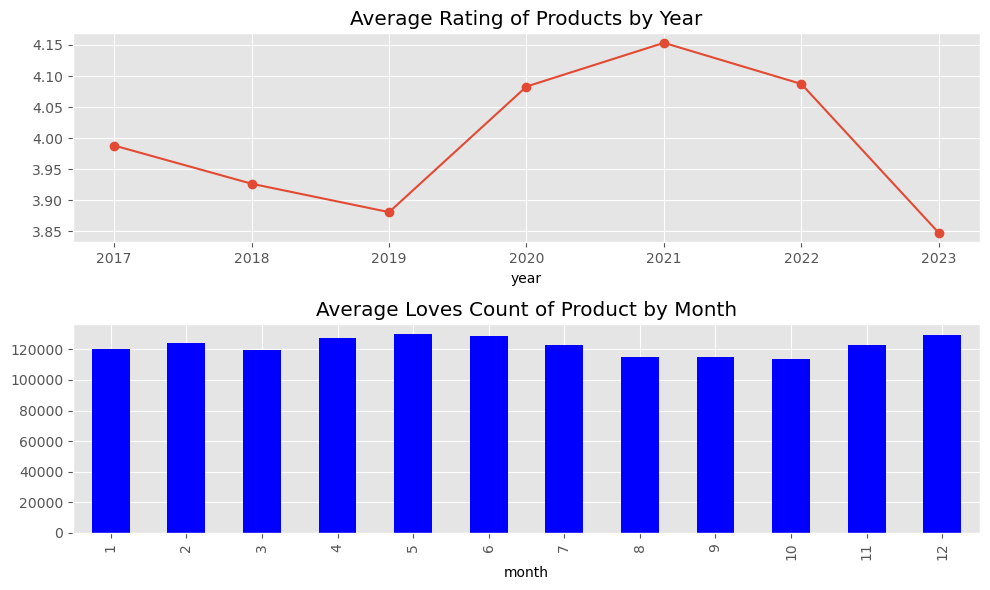

In [35]:
df['submission_time'] = pd.to_datetime(df['submission_time'])

df['year'] = df['submission_time'].dt.year
df['month'] = df['submission_time'].dt.month


yearly_avg_rating = df.groupby('year')['rating'].mean()
monthly_avg_loves = df.groupby('month')['loves_count'].mean()



plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
yearly_avg_rating.plot(kind='line', marker='o')
plt.title('Average Rating of Products by Year')

plt.subplot(2, 1, 2)
monthly_avg_loves.plot(kind='bar', color='blue')
plt.title('Average Loves Count of Product by Month')

plt.tight_layout()
plt.show()


# Most Recommended products for each skin type 

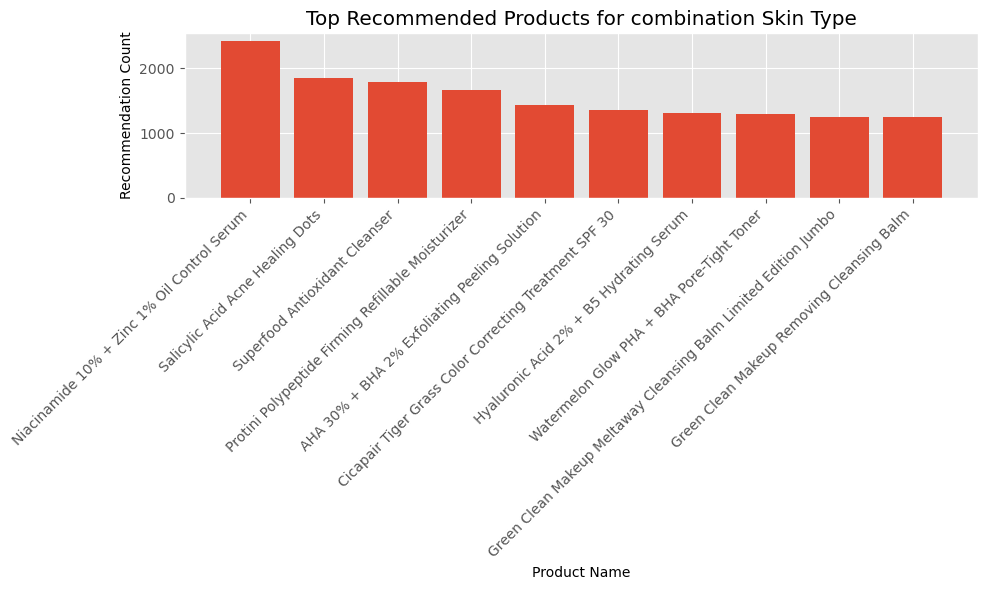

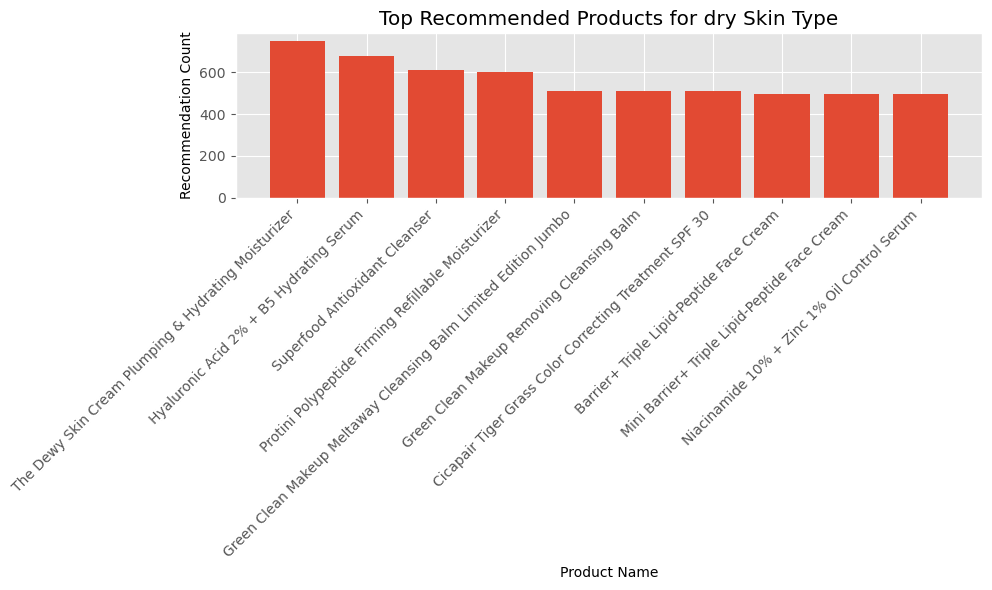

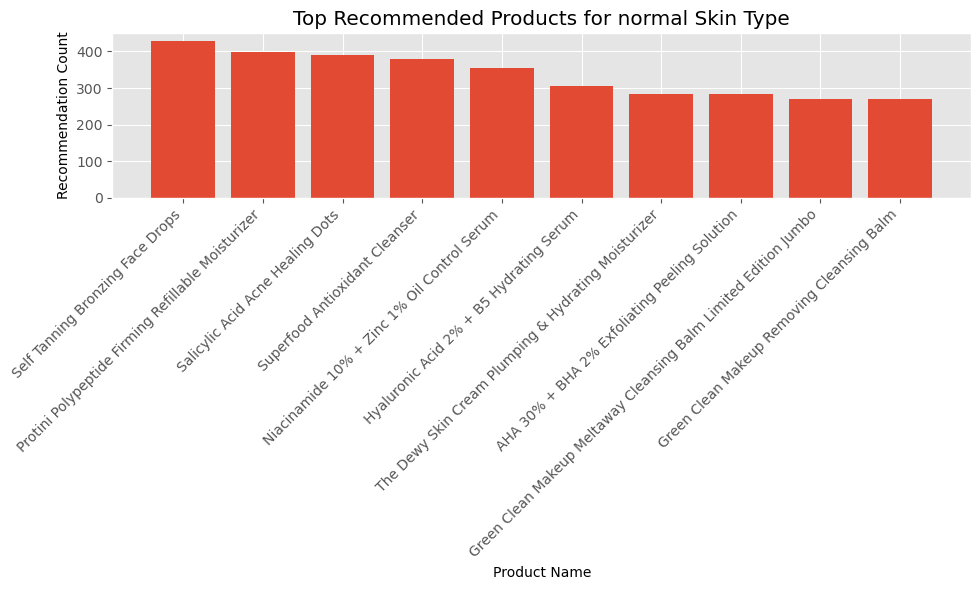

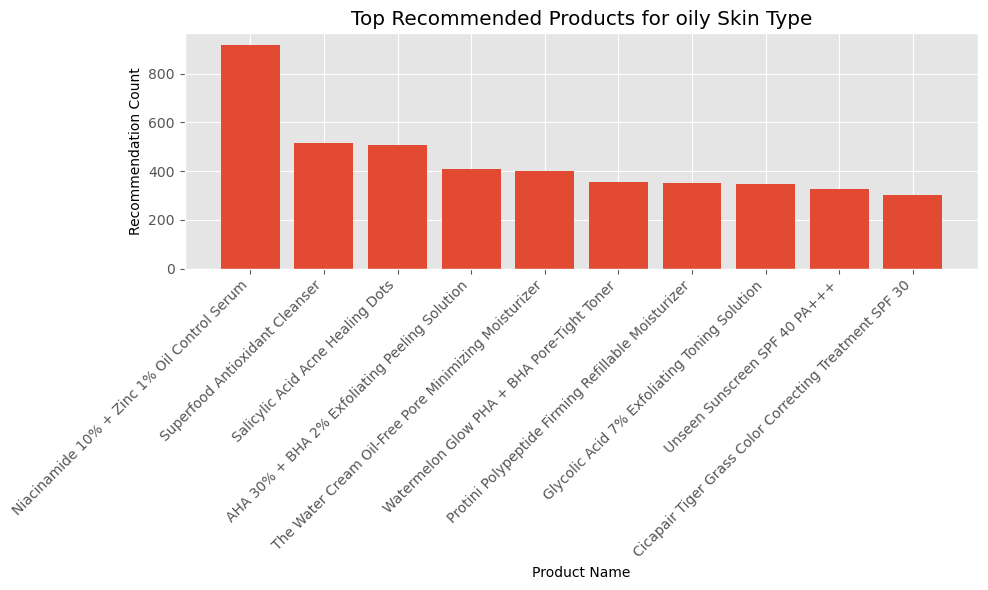

In [37]:
import pandas as pd
import matplotlib.pyplot as plt


skin_type_recommendations = df.groupby(['skin_type', 'product_name']).size().reset_index(name='recommendation_count')

skin_type_recommendations = skin_type_recommendations.sort_values(by=['skin_type', 'recommendation_count'], ascending=[True, False])


unique_skin_types = skin_type_recommendations['skin_type'].unique()

for skin_type in unique_skin_types:
    plt.figure(figsize=(10, 6))
    data_subset = skin_type_recommendations[skin_type_recommendations['skin_type'] == skin_type].head(10)
    plt.bar(data_subset['product_name'], data_subset['recommendation_count'])
    plt.xlabel('Product Name')
    plt.ylabel('Recommendation Count')
    plt.title(f"Top Recommended Products for {skin_type} Skin Type")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


Text(0.5, 0.98, 'Most reccomended product for each skin types')

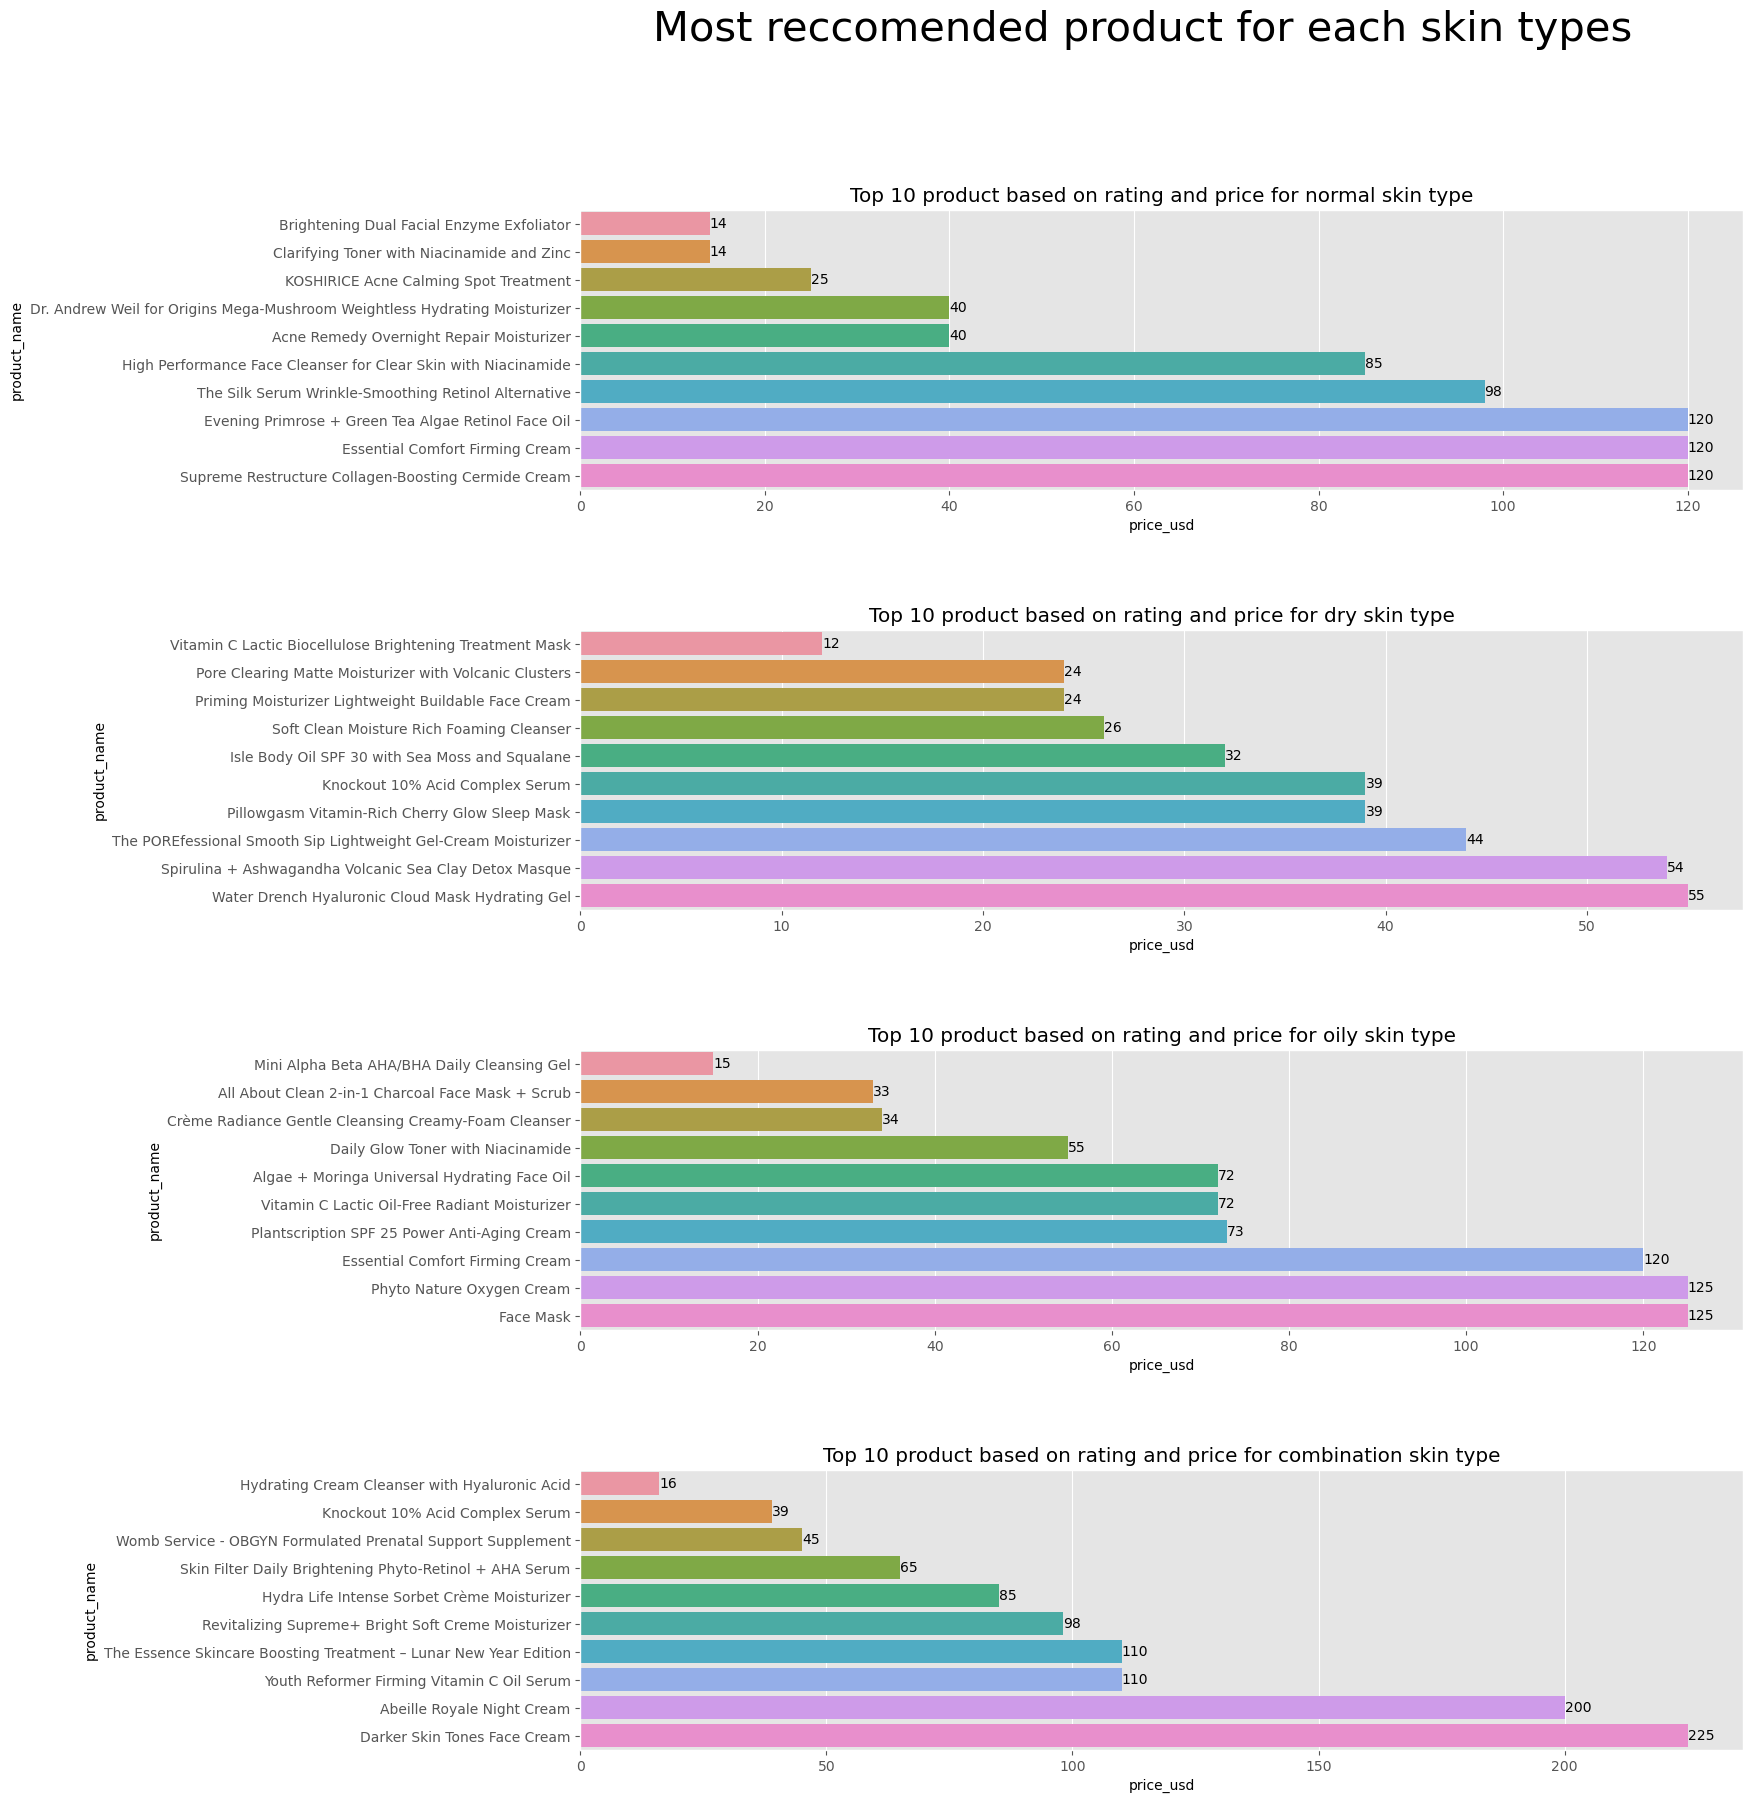

In [39]:
# Most reccomended product for each skin_type
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4,ncols=1,figsize= (15,20))
fig.subplots_adjust(hspace=0.5)

product_skin = df.groupby(['skin_type','product_id','product_name','price_usd']).mean(numeric_only=True)['rating'].reset_index()\
.sort_values('rating',ascending=False)

normal_skin = product_skin[product_skin['skin_type'] == 'normal'].sort_values('price_usd',ascending=True)\
.sort_values(['rating'],ascending=False).head(10)\
.sort_values('price_usd',ascending=True)
ax1 = sns.barplot(normal_skin,x='price_usd',y='product_name',ax=ax1)
ax1.set_title("Top 10 product based on rating and price for normal skin type")
for i in ax1.containers:
    ax1.bar_label(i)
    
dry_skin = product_skin[product_skin['skin_type'] == 'dry'].sort_values('price_usd',ascending=True)\
.sort_values(['rating'],ascending=False).head(10)\
.sort_values('price_usd',ascending=True)
ax2 = sns.barplot(dry_skin,x='price_usd',y='product_name',ax=ax2)
ax2.set_title("Top 10 product based on rating and price for dry skin type")
for i in ax2.containers:
    ax2.bar_label(i)    
    
oily_skin = product_skin[product_skin['skin_type'] == 'oily'].sort_values('price_usd',ascending=True)\
.sort_values(['rating'],ascending=False).head(10)\
.sort_values('price_usd',ascending=True)
ax3 = sns.barplot(oily_skin,x='price_usd',y='product_name',ax=ax3)
ax3.set_title("Top 10 product based on rating and price for oily skin type")
for i in ax3.containers:
    ax3.bar_label(i)    
    
combination_skin = product_skin[product_skin['skin_type'] == 'combination'].sort_values('price_usd',ascending=True)\
.sort_values(['rating'],ascending=False).head(10)\
.sort_values('price_usd',ascending=True)
ax4 = sns.barplot(combination_skin,x='price_usd',y='product_name',ax=ax4)
ax4.set_title("Top 10 product based on rating and price for combination skin type")
for i in ax4.containers:
    ax4.bar_label(i)    
    
    
fig.suptitle("Most reccomended product for each skin types",fontsize=30)

# Price Distribution 

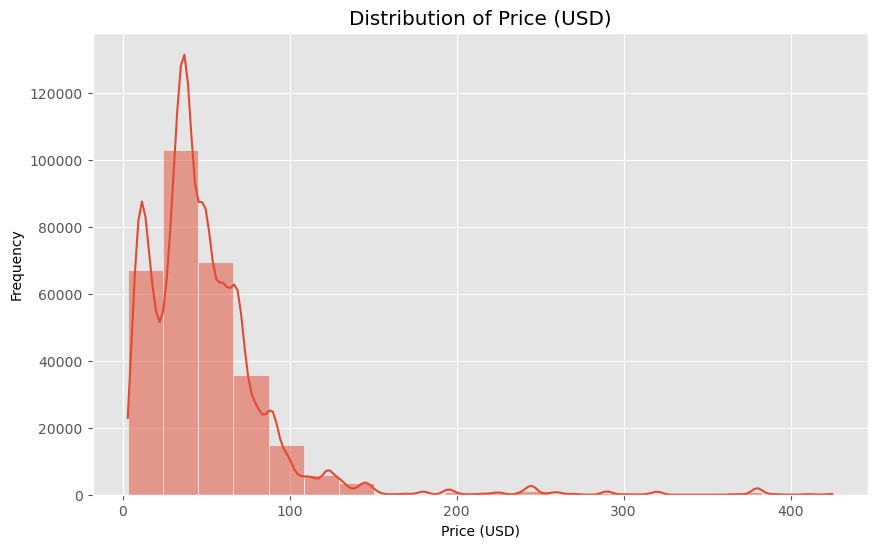

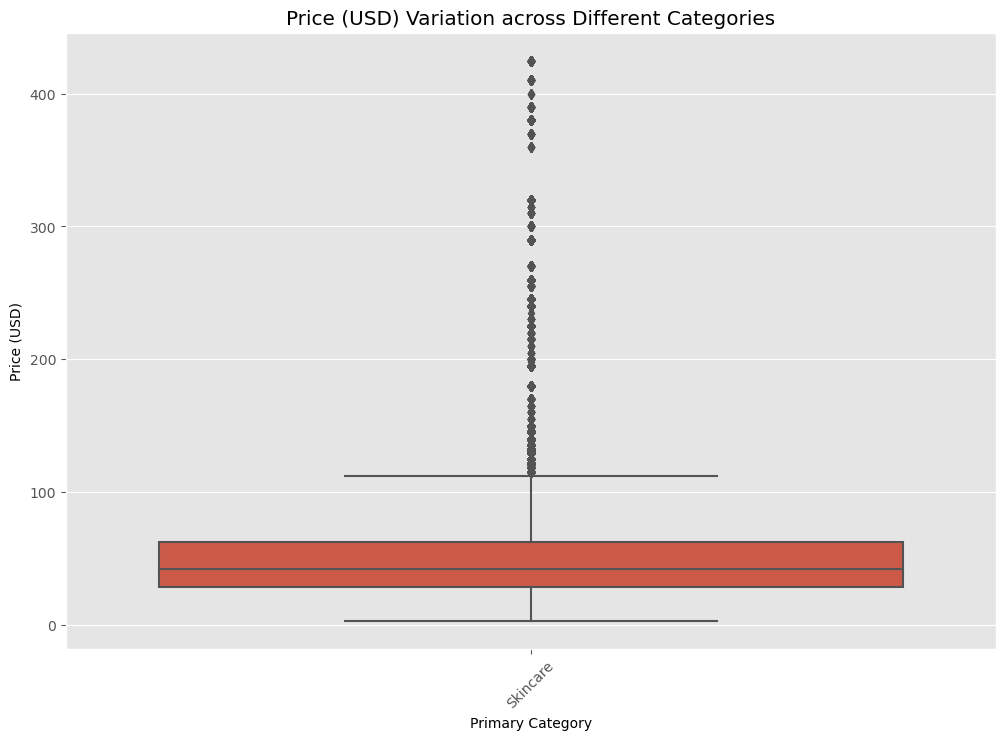

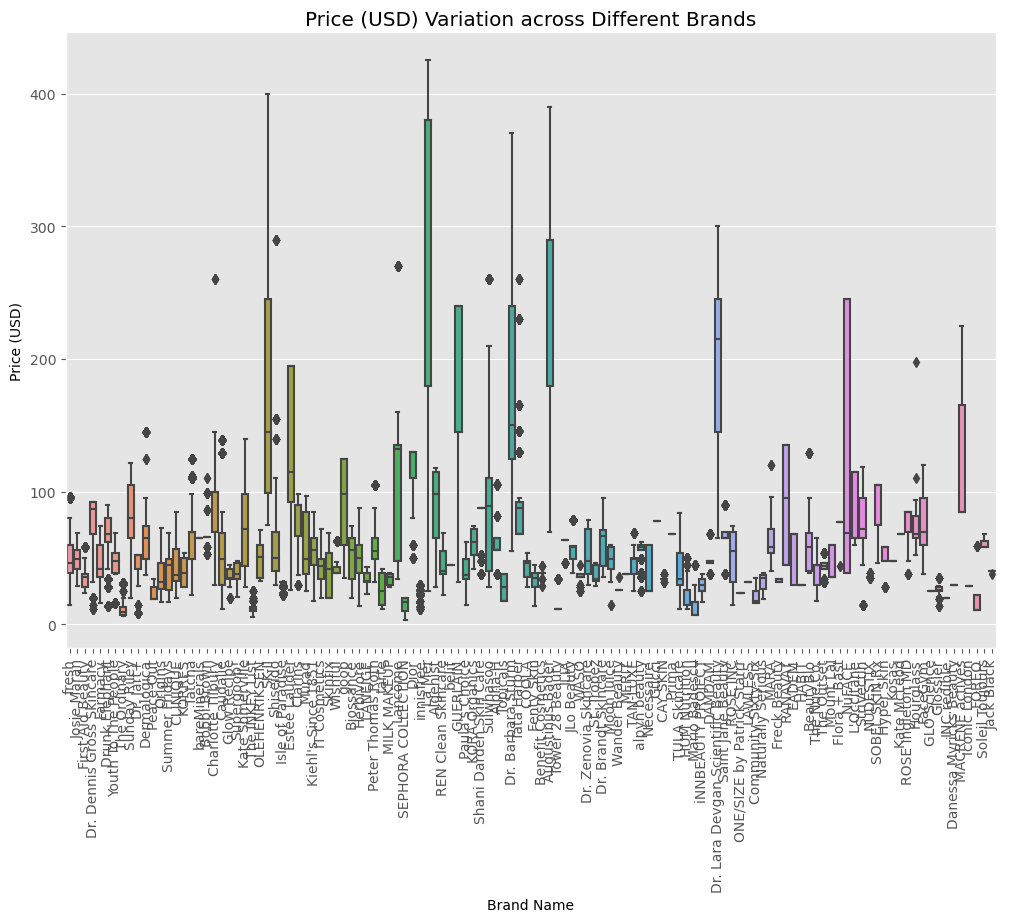

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the distribution of 'price_usd'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price_usd', bins=20, kde=True)
plt.title("Distribution of Price (USD)")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

# Visualize 'price_usd' variation across different categories
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='primary_category', y='price_usd')
plt.title("Price (USD) Variation across Different Categories")
plt.xlabel("Primary Category")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.show()

# Visualize 'price_usd' variation across different brands
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='brand_name', y='price_usd')
plt.title("Price (USD) Variation across Different Brands")
plt.xlabel("Brand Name")
plt.ylabel("Price (USD)")
plt.xticks(rotation=90)
plt.show()


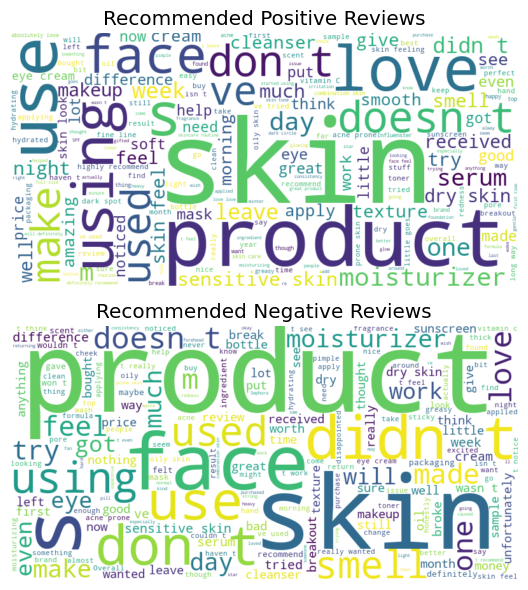

In [49]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


positive_reviews = df[df['is_recommended'] == 1]['review_text']
negative_reviews = df[df['is_recommended'] == 0]['review_text']


wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))

s
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews))

# Plot word clouds side by side for rach positive and negative reviews 
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Recommended Positive Reviews')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Recommended Negative Reviews')
plt.axis('off')

plt.tight_layout()
plt.show()


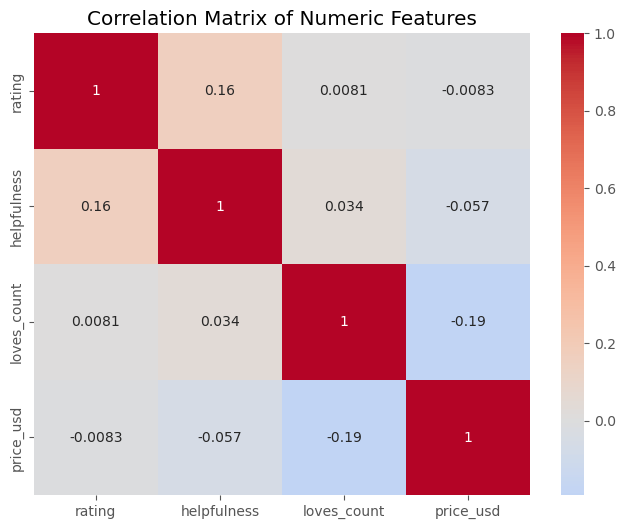

In [51]:

numeric_columns = ['rating', 'helpfulness', 'loves_count', 'price_usd']


correlation_matrix = df[numeric_columns].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


 💡 Hence there is no fixed and good relatiob between these features 

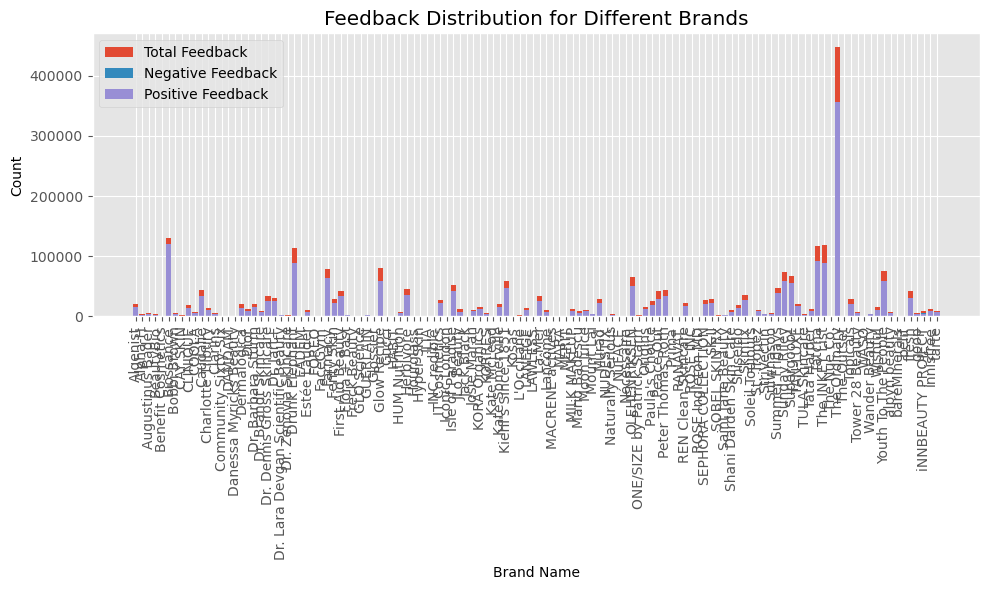

In [63]:

brand_feedback = df.groupby('brand_name').agg({
    'total_feedback_count': 'sum',
    'total_neg_feedback_count': 'sum',
    'total_pos_feedback_count': 'sum'
}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))

plt.bar(brand_feedback['brand_name'], brand_feedback['total_feedback_count'], label='Total Feedback')
plt.bar(brand_feedback['brand_name'], brand_feedback['total_neg_feedback_count'], label='Negative Feedback')
plt.bar(brand_feedback['brand_name'], brand_feedback['total_pos_feedback_count'], label='Positive Feedback')

plt.xlabel('Brand Name')
plt.ylabel('Count')
plt.title('Feedback Distribution for Different Brands')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


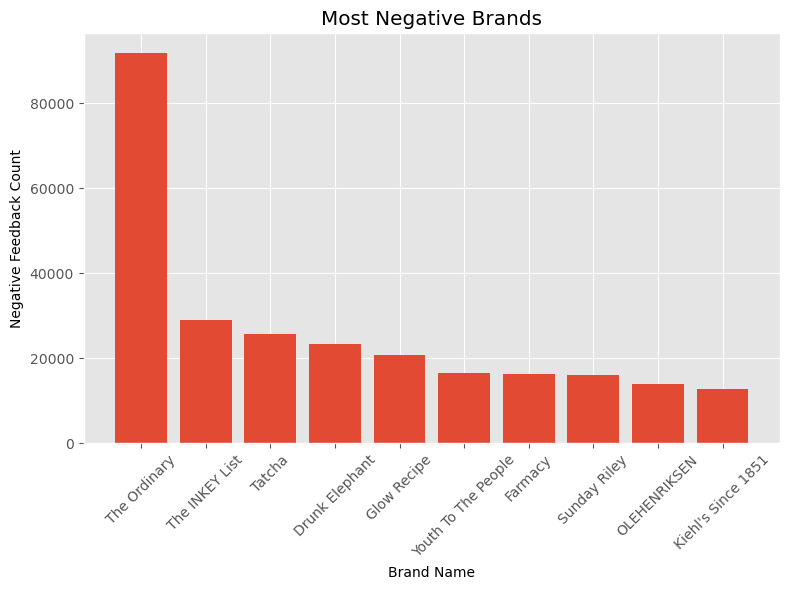

In [67]:
plt.figure(figsize=(8, 6))

plt.bar(top_negative_brands['brand_name'], top_negative_brands['total_neg_feedback_count'])
plt.xlabel('Brand Name')
plt.ylabel('Negative Feedback Count')
plt.title('Most Negative Brands')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


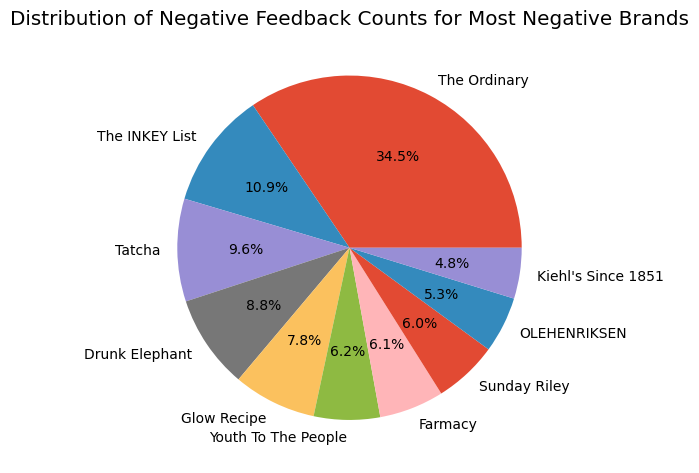

In [66]:
plt.figure(figsize=(6, 6))

plt.pie(top_negative_brands['total_neg_feedback_count'], labels=top_negative_brands['brand_name'], autopct='%1.1f%%')
plt.title('Distribution of Negative Feedback Counts for Most Negative Brands')
plt.tight_layout()
plt.show()



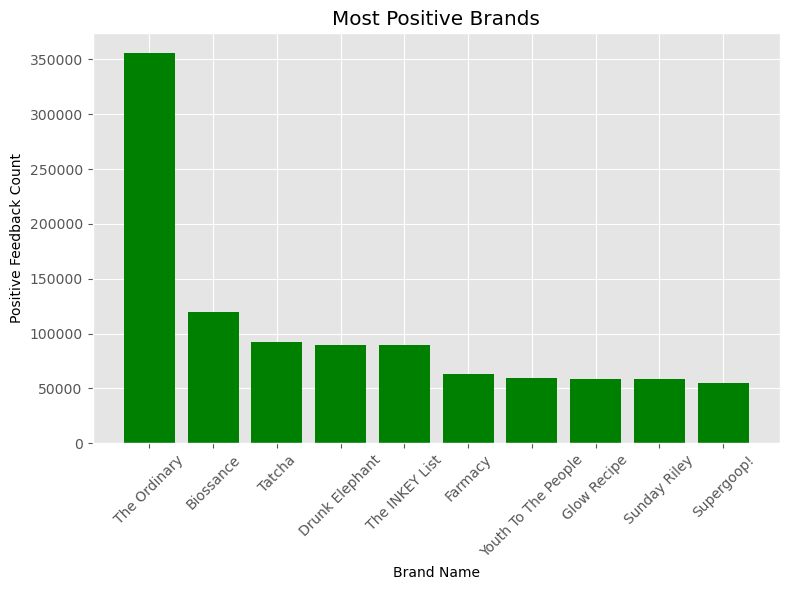

In [68]:
plt.figure(figsize=(8, 6))

plt.bar(top_positive_brands['brand_name'], top_positive_brands['total_pos_feedback_count'], color='green')
plt.xlabel('Brand Name')
plt.ylabel('Positive Feedback Count')
plt.title('Most Positive Brands')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


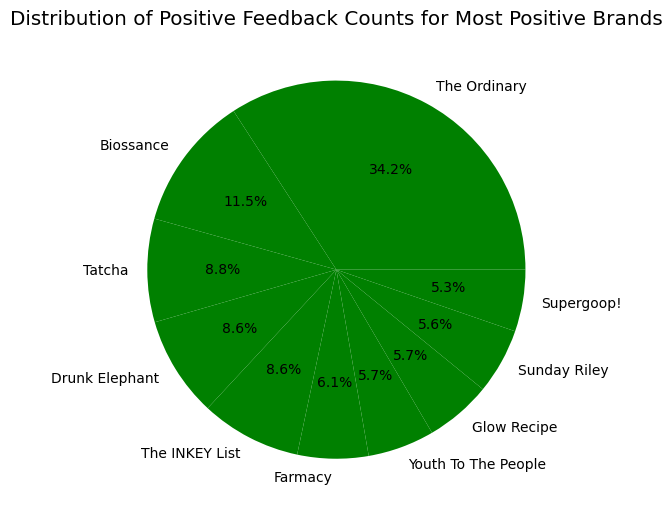

In [74]:
plt.figure(figsize=(6, 6))

plt.pie(top_positive_brands['total_pos_feedback_count'], labels=top_positive_brands['brand_name'], autopct='%1.1f%%', colors=['green'])
plt.title('Distribution of Positive Feedback Counts for Most Positive Brands')
plt.tight_layout()
plt.show()

**Hence the brand "The Ordinary" has most negative and most positive recommendations**